In [1]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

import spacy
nlp = spacy.load('en')

In [2]:
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    s = sub('(RT\s@)', '@', s) # clean out RT's
    s = sub('(@[A-Za-z0-9_]+(:|=:)\s)|(@[A-Za-z0-9_]+)', '', s) # clean out mentions
    s = sub('https?:/\S+', '', s) # clean out URLs
    
    # BONUS: Try using the library "spacy" to 
    doc = nlp(s)
    
    # do further processing, such as lemmatizing 
    s = ' '.join([token.lemma_ for token in doc])
    
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    #s = ' '.join([ent.label_ for ent in doc.ents])
        
    # or adding the part of speech or dependency code to the word 
    #s = ' '.join([token.tag_ for token in doc])
    
    return s

In [3]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [4]:
X.map(clean_twitter)

0       here be cnn on sharia law . -PRON- can be stone or have -PRON- hand cut off ...
1       look obama clinton crony illegally arm & amp ; train muslim terrorist includ...
2       # throwbackthursday # bengarrison # cartoon from 2013 # obama get crown # wa...
3                  say ' islam be peace ' , or else !   # trump # maga # isis # tcot   
4                                             all aboard the trump train ! # choochoo 🚂
5         flashback & gt;&gt ; judicial watch releases huma abedin deposition testimony
6       follow fbi presser ,   say " the system be rig ! "   & amp ;   weigh in # fo...
7                                      trump : " -PRON- be run against a rigged press "
8       literally 98 % of hillary supporter -PRON- see online be astroturf spammer w...
9                                                                        \n islam . ...
10      . \n psycho - mother \n hillary at -PRON- most evil . \n\n # maga   # basket...
11      the unthinkable have hap

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

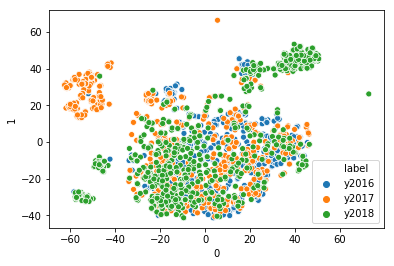

In [6]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

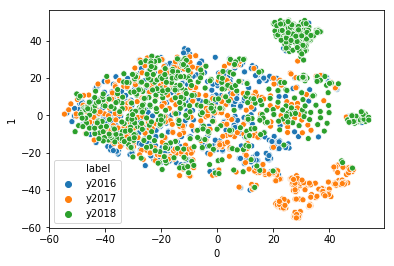

In [7]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['PRON', 'make', 'whatev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


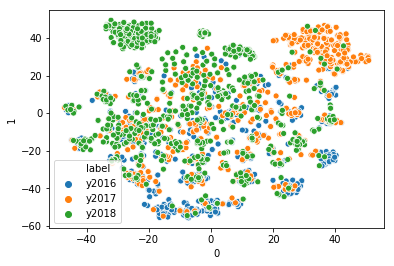

In [8]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer(preprocessor = clean_twitter, 
                             stop_words='english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)